In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [7]:
df=pd.read_csv(r"C:\Users\ASUS\Downloads\pima-indians-diabetes.csv",header=None)

In [8]:
df

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
from tensorflow.keras.layers import Dense,Dropout

In [5]:
from tensorflow.keras.models import Sequential

<Axes: >

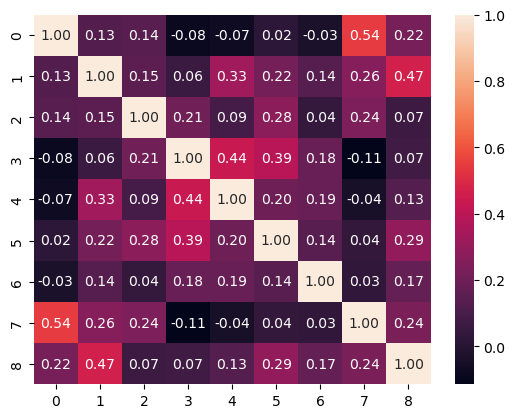

In [11]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,fmt='0.2f')

In [12]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [13]:
X

,0,1,2,3,4,5,6,7
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
s=StandardScaler()

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [18]:
X_train=s.fit_transform(X_train)
X_test=s.transform(X_test)

In [19]:
model=Sequential()
model.add(Dense(32,activation='relu',input_dim=8))
model.add(Dense(1,activation='sigmoid'))

In [20]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
hist=model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=32,epochs=50)

Epoch 1/50
20/20 [==============================] - 0s 11ms/step - loss: 0.4159 - accuracy: 0.7997 - val_loss: 0.5334 - val_accuracy: 0.7532
Epoch 2/50
20/20 [==============================] - 0s 7ms/step - loss: 0.4147 - accuracy: 0.8013 - val_loss: 0.5356 - val_accuracy: 0.7403
Epoch 3/50
20/20 [==============================] - 0s 7ms/step - loss: 0.4144 - accuracy: 0.7980 - val_loss: 0.5366 - val_accuracy: 0.7403
Epoch 4/50
20/20 [==============================] - 0s 7ms/step - loss: 0.4142 - accuracy: 0.7964 - val_loss: 0.5354 - val_accuracy: 0.7532
Epoch 5/50
20/20 [==============================] - 0s 8ms/step - loss: 0.4133 - accuracy: 0.7980 - val_loss: 0.5357 - val_accuracy: 0.7532
Epoch 6/50
20/20 [==============================] - 0s 6ms/step - loss: 0.4129 - accuracy: 0.7964 - val_loss: 0.5333 - val_accuracy: 0.7597
Epoch 7/50
20/20 [==============================] - 0s 5ms/step - loss: 0.4124 - accuracy: 0.7948 - val_loss: 0.5341 - val_accuracy: 0.7597
Epoch 8/50
20/20 [=

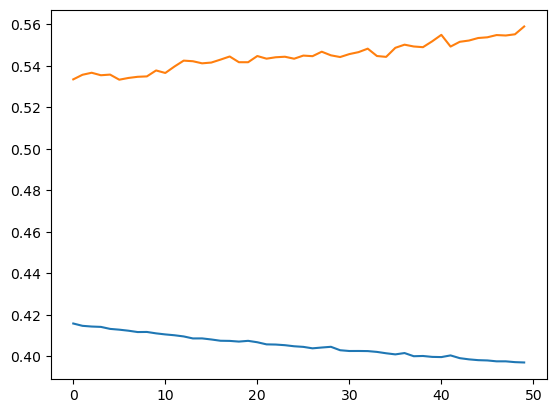

In [25]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

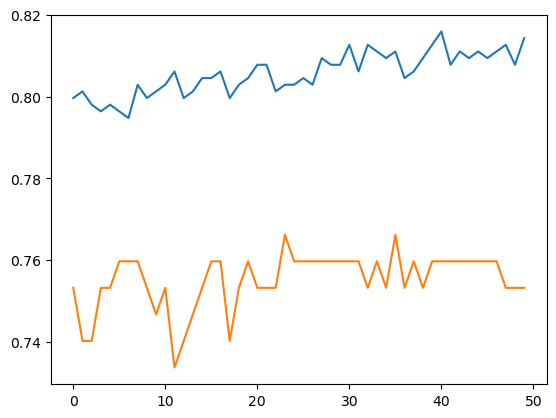

In [26]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

In [29]:
!pip install keras-tuner

     -------------------------------------- 129.1/129.1 kB 1.5 MB/s eta 0:00:00


In [31]:
import keras_tuner as kt

In [32]:
#OPTIMIZER

In [37]:
def build_model(hp):
    model=Sequential()
    model.add(Dense(32,activation='relu',input_dim=8))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer=hp.Choice('optimizer',values=['adam','sgd','rmsprop','adadelta']),loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [38]:
tuner=kt.RandomSearch(build_model,max_trials=5,objective='val_accuracy')

In [40]:
tuner.search(X_train,y_train,validation_data=(X_test,y_test),epochs=10)

Trial 4 Complete [00h 00m 03s]
val_accuracy: 0.6168830990791321

Best val_accuracy So Far: 0.7467532753944397
Total elapsed time: 00h 00m 34s


In [41]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'sgd'}

In [42]:
m=tuner.get_best_models(num_models=1)[0]

In [43]:
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
model.fit(X_train,y_train,batch_size=32,epochs=100,validation_data=(X_test,y_test),initial_epoch=11)

Epoch 12/100
20/20 [==============================] - 0s 12ms/step - loss: 0.3966 - accuracy: 0.8192 - val_loss: 0.5576 - val_accuracy: 0.7532
Epoch 13/100
20/20 [==============================] - 0s 6ms/step - loss: 0.3963 - accuracy: 0.8111 - val_loss: 0.5599 - val_accuracy: 0.7468
Epoch 14/100
20/20 [==============================] - 0s 6ms/step - loss: 0.3964 - accuracy: 0.8094 - val_loss: 0.5618 - val_accuracy: 0.7532
Epoch 15/100
20/20 [==============================] - 0s 6ms/step - loss: 0.3958 - accuracy: 0.8143 - val_loss: 0.5643 - val_accuracy: 0.7468
Epoch 16/100
20/20 [==============================] - 0s 5ms/step - loss: 0.3955 - accuracy: 0.8160 - val_loss: 0.5637 - val_accuracy: 0.7468
Epoch 17/100
20/20 [==============================] - 0s 6ms/step - loss: 0.3959 - accuracy: 0.8225 - val_loss: 0.5632 - val_accuracy: 0.7468
Epoch 18/100
20/20 [==============================] - 0s 5ms/step - loss: 0.3953 - accuracy: 0.8176 - val_loss: 0.5632 - val_accuracy: 0.7532
Epoch

In [45]:
#No of Neurons

In [47]:
def build_model_2(hp):
    model=Sequential()
    units=hp.Int('u',8,128,step=8)
    model.add(Dense(units=units,activation='relu',input_dim=8))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer='SGD',loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [53]:
t=kt.RandomSearch(build_model_2,objective='val_accuracy',max_trials=5,directory='my_dir')

In [54]:
t.search(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Trial 5 Complete [00h 00m 03s]
val_accuracy: 0.6818181872367859

Best val_accuracy So Far: 0.7597402334213257
Total elapsed time: 00h 00m 14s


In [55]:
t.get_best_hyperparameters()[0].values

{'u': 104}

In [56]:
m2=t.get_best_models(num_models=1)[0]

In [58]:
m2.fit(X_train,y_train,batch_size=32,epochs=100,initial_epoch=11,validation_data=(X_test,y_test))

Epoch 12/100
20/20 [==============================] - 1s 17ms/step - loss: 0.5387 - accuracy: 0.7655 - val_loss: 0.5544 - val_accuracy: 0.7532
Epoch 13/100
20/20 [==============================] - 0s 6ms/step - loss: 0.5319 - accuracy: 0.7622 - val_loss: 0.5496 - val_accuracy: 0.7597
Epoch 14/100
20/20 [==============================] - 0s 7ms/step - loss: 0.5256 - accuracy: 0.7638 - val_loss: 0.5447 - val_accuracy: 0.7727
Epoch 15/100
20/20 [==============================] - 0s 6ms/step - loss: 0.5200 - accuracy: 0.7655 - val_loss: 0.5403 - val_accuracy: 0.7727
Epoch 16/100
20/20 [==============================] - 0s 7ms/step - loss: 0.5147 - accuracy: 0.7687 - val_loss: 0.5363 - val_accuracy: 0.7662
Epoch 17/100
20/20 [==============================] - 0s 5ms/step - loss: 0.5099 - accuracy: 0.7622 - val_loss: 0.5329 - val_accuracy: 0.7597
Epoch 18/100
20/20 [==============================] - 0s 6ms/step - loss: 0.5056 - accuracy: 0.7638 - val_loss: 0.5303 - val_accuracy: 0.7597
Epoch

In [59]:
#Number of Layers

In [84]:
def build_model_3(hp):
    model=Sequential()
    model.add(Dense(72,activation='relu',input_dim=8))
    for i in range(hp.Int('Layers',min_value=2,max_value=20)):
        model.add(Dense(72,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [88]:
t2=kt.RandomSearch(build_model_3,objective='val_accuracy',max_trials=5,directory='my_dir_2')
t2.search(X_train,y_train,validation_data=(X_test,y_test),epochs=5)

Trial 5 Complete [00h 00m 02s]
val_accuracy: 0.7792207598686218

Best val_accuracy So Far: 0.7792207598686218
Total elapsed time: 00h 00m 17s


In [89]:
t2.get_best_hyperparameters()[0].values

{'Layers': 11}

In [90]:
m3=t2.get_best_models(num_models=1)[0]

In [91]:
m3.fit(X_train,y_train,epochs=100,initial_epoch=11,validation_data=(X_train,y_train))

Epoch 12/100
20/20 [==============================] - 4s 24ms/step - loss: 0.4838 - accuracy: 0.7720 - val_loss: 0.4464 - val_accuracy: 0.7883
Epoch 13/100
20/20 [==============================] - 0s 8ms/step - loss: 0.4468 - accuracy: 0.7866 - val_loss: 0.4257 - val_accuracy: 0.7948
Epoch 14/100
20/20 [==============================] - 0s 12ms/step - loss: 0.4331 - accuracy: 0.7932 - val_loss: 0.4172 - val_accuracy: 0.8192
Epoch 15/100
20/20 [==============================] - 0s 12ms/step - loss: 0.4153 - accuracy: 0.8111 - val_loss: 0.3955 - val_accuracy: 0.8192
Epoch 16/100
20/20 [==============================] - 0s 11ms/step - loss: 0.3991 - accuracy: 0.8257 - val_loss: 0.3934 - val_accuracy: 0.8160
Epoch 17/100
20/20 [==============================] - 0s 11ms/step - loss: 0.3971 - accuracy: 0.8225 - val_loss: 0.3662 - val_accuracy: 0.8550
Epoch 18/100
20/20 [==============================] - 0s 8ms/step - loss: 0.3780 - accuracy: 0.8469 - val_loss: 0.3503 - val_accuracy: 0.8502
E

In [92]:
#Combination

In [109]:
def build_model_mix(hp):
    model=Sequential()
    c=0
    for i in range(hp.Int('num_layers',min_value=1,max_value=20)):
        if c==0:
            model.add(Dense(hp.Int('units'+str(i),min_value=8,max_value=128,step=8),activation=hp.Choice('activation'+str(i),values=['relu','tanh','sigmoid']),input_dim=8))
        else:
            model.add(Dense(hp.Int('units'+str(i),min_value=8,max_value=128,step=8),activation=hp.Choice('activation'+str(i),values=['relu','tanh','sigmoid'])))
        c+=1
    model.compile(optimizer=hp.Choice('optimizer',values=['adam','rmsprop','sgd','adadelta']),loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [112]:
tuner_new=kt.RandomSearch(build_model_mix,objective='val_accuracy',max_trials=5,directory='f')

In [113]:
tuner_new.search(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=32)

Trial 5 Complete [00h 00m 04s]
val_accuracy: 0.0

Best val_accuracy So Far: 0.0
Total elapsed time: 00h 00m 19s


In [114]:
tuner_new.get_best_hyperparameters()[0].values

{'num_layers': 11,
 'units0': 96,
 'activation0': 'tanh',
 'optimizer': 'sgd',
 'units1': 8,
 'activation1': 'relu',
 'units2': 8,
 'activation2': 'relu',
 'units3': 8,
 'activation3': 'relu',
 'units4': 8,
 'activation4': 'relu',
 'units5': 8,
 'activation5': 'relu',
 'units6': 8,
 'activation6': 'relu',
 'units7': 8,
 'activation7': 'relu',
 'units8': 8,
 'activation8': 'relu',
 'units9': 8,
 'activation9': 'relu',
 'units10': 8,
 'activation10': 'relu'}

In [115]:
model_final=tuner_new.get_best_models(num_models=1)[0]

In [116]:
model_final.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 96)                864       
                                                                 
 dense_1 (Dense)             (None, 8)                 776       
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 8)                 72        
                                                                 
 dense_6 (Dense)             (None, 8)                 7

In [117]:
H=model_final.fit(X_train,y_train,validation_data=(X_test,y_test),initial_epoch=6,epochs=100)

Epoch 7/100
20/20 [==============================] - 2s 22ms/step - loss: 8.8071 - accuracy: 0.0000e+00 - val_loss: 8.7295 - val_accuracy: 0.0000e+00
Epoch 8/100
20/20 [==============================] - 0s 6ms/step - loss: 8.8071 - accuracy: 0.0000e+00 - val_loss: 8.7295 - val_accuracy: 0.0000e+00
Epoch 9/100
20/20 [==============================] - 0s 6ms/step - loss: 8.8071 - accuracy: 0.0000e+00 - val_loss: 8.7295 - val_accuracy: 0.0000e+00
Epoch 10/100
20/20 [==============================] - 0s 6ms/step - loss: 8.8071 - accuracy: 0.0000e+00 - val_loss: 8.7295 - val_accuracy: 0.0000e+00
Epoch 11/100
20/20 [==============================] - 0s 6ms/step - loss: 8.8071 - accuracy: 0.0000e+00 - val_loss: 8.7295 - val_accuracy: 0.0000e+00
Epoch 12/100
20/20 [==============================] - 0s 8ms/step - loss: 8.8071 - accuracy: 0.0000e+00 - val_loss: 8.7295 - val_accuracy: 0.0000e+00
Epoch 13/100
20/20 [==============================] - 0s 6ms/step - loss: 8.8071 - accuracy: 0.0000e+0